In [1]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Sort Data by Timestamp
tweet_raw_file_dir = "C:\\Users\\grace\\Desktop\\Digital_Discourse\\Merged_Tesla\\20240103_merged_tesla.csv"
df = pd.read_csv(tweet_raw_file_dir)

# Convert the "Timestamp" column to datetime format, allowing inference of formats
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['Timestamp'])

# Sort the DataFrame by Timestamp
df = df.sort_values(by='Timestamp')
df.head(len(df))

,Timestamp,Username,Tweet Content,Retweets,Likes,Replies,Unnamed: 6,Unnamed: 7,scores
2624,2023-10-17,Tesla,Tesla Full Self-Driving capability demo in Aus...,3969,21262,1953,NaN,NaN,0.523782
2625,2023-10-18,Tesla,Q3 Shareholder Update → https://t.co/sXBSeLibS...,2859,16715,1480,NaN,NaN,0.495593
2626,2023-10-18,elonmusk,RT @Tesla: Q3 Shareholder Update → https://t.c...,2855,0,0,NaN,NaN,0.267585
2627,2023-10-18,elonmusk,RT @Tesla: Tesla Full Self-Driving capability ...,3969,0,0,NaN,NaN,0.183875
2628,2023-10-19,elonmusk,@SawyerMerritt @Tesla Cool,110,2236,183,NaN,NaN,0.827262
...,...,...,...,...,...,...,...,...,...
4639,2023-12-16,NaN,@soccer_mario11 I'm amazed by Tesla's constant...,0,0,0,NaN,NaN,0.952863
4638,2023-12-16,NaN,Chainlink Аirdrop➡️https://t.co/mAzpoAB3at\n\n...,0,0,0,NaN,NaN,0.012671
4637,2023-12-16,NaN,Check this➡️https://t.co/0YF4GIJVJd\n\n@meta_t...,0,0,0,NaN,NaN,-0.000702
4648,2023-12-16,NaN,@soccer_mario11 I'm amazed by Tesla's constant...,0,0,0,NaN,NaN,0.952863


In [2]:
import pandas as pd

# Load your data
# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Convert 'Likes', 'Replies', 'Retweets', and 'scores' columns to numeric, replacing non-numeric values with NaN
df[['Likes', 'Replies', 'Retweets', 'scores']] = df[['Likes', 'Replies', 'Retweets', 'scores']].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0
df[['Likes', 'Replies', 'Retweets', 'scores']] = df[['Likes', 'Replies', 'Retweets', 'scores']].fillna(0)

# Calculate Sentiment Index
df['Sentiment_Index'] = (df['Likes'] + df['Replies'] + df['Retweets']) * df['scores']

# Extract the date from the 'Timestamp' column
df['Date'] = df['Timestamp'].dt.date

# Group the data by date and sum the 'Sentiment_Index' for each date
processed_data = df.groupby('Date')['Sentiment_Index'].sum().reset_index()

# Specify the target directory and filename for the processed data
target_directory = "C:\\Users\\grace\\Desktop\\Digital_Discourse\\Output_Tesla\\"
final_file_path = target_directory +  "sentiment_index_by_date.csv" 

# Save the processed data to a new CSV file without the index column
processed_data.to_csv(final_file_path, index=False)

# Read the processed data back into a DataFrame (optional)
df = pd.read_csv(final_file_path)
df.head(len(df))

,Date,Sentiment_Index
0,2023-10-17,14238.488671
1,2023-10-18,11927.977017
2,2023-10-19,2092.146764
3,2023-10-22,55211.303864
4,2023-10-23,1227.507377
5,2023-10-24,15822.926286
6,2023-10-25,-4759.397541
7,2023-10-26,-6042.343128
8,2023-10-27,-5279.070689
9,2023-10-28,248.067510


In [3]:
TSLA_price_file_dir = "C:\\Users\\grace\\Desktop\\Digital_Discourse\\Output_Tesla\\Tesla_Price.csv"
df = pd.read_csv(TSLA_price_file_dir)
df.head(len(df))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
1,2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600
2,2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200
3,2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000
4,2023-10-09,255.309998,261.359985,252.050003,259.670013,259.670013,101377900
...,...,...,...,...,...,...,...
58,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
59,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
60,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
61,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [4]:
# Step 5: Merge Sentiment_Index with Price_Next_Day

# Read data from both files
sentiment_df = pd.read_csv(final_file_path)
TSLA_df = pd.read_csv(TSLA_price_file_dir)

# Convert date columns to datetime format for consistency
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date'])

# Select only the 'Date' and 'Open' columns from TSLA_df
TSLA_subset = TSLA_df[['Date', 'Open']]

# Merge data based on the 'Date' column
merged_df = sentiment_df.merge(TSLA_subset, on='Date', how='left')

# Overwrite the existing file with the merged data
merged_df.to_csv(final_file_path, index=False)

# Read the modified file back into a DataFrame (optional)
df = pd.read_csv(final_file_path)
df.head(len(df))

,Date,Sentiment_Index,Open
0,2023-10-17,14238.488671,250.100006
1,2023-10-18,11927.977017,252.699997
2,2023-10-19,2092.146764,225.949997
3,2023-10-22,55211.303864,NaN
4,2023-10-23,1227.507377,210.000000
5,2023-10-24,15822.926286,216.500000
6,2023-10-25,-4759.397541,215.880005
7,2023-10-26,-6042.343128,211.320007
8,2023-10-27,-5279.070689,210.600006
9,2023-10-28,248.067510,NaN


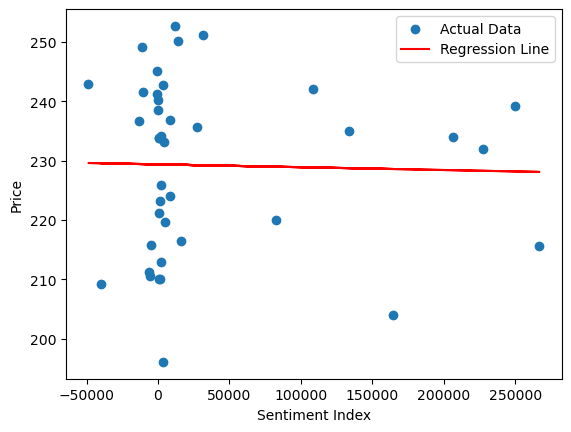

In [5]:
# Read your dataset into a pandas DataFrame
data = pd.read_csv(final_file_path)

# Drop rows with NaN values in 'Sentiment_Index' or 'Open' columns
data = data.dropna(subset=['Sentiment_Index', 'Open'])

# Define the independent (X) and dependent (y) variables
X = data['Sentiment_Index'].values.reshape(-1, 1)
y = data['Open'].values

# Check if there are still valid data points after dropping NaN values
if len(X) > 0:
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Visualize the data and regression line
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.xlabel('Sentiment Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
else:
    print("No valid data points after dropping NaN values.")

In [6]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]
epsilon = y - y_pred

print(f'Intercept (beta_0): {beta_0}')
print(f'Slope (beta_1): {beta_1}')
print(f'Residuals (epsilon): {epsilon}')

Intercept (beta_0): 229.38618604037478
Slope (beta_1): -4.750334218116891e-06
Residuals (epsilon): [ 20.78145754  23.37047284  -3.42625064 -19.38035497 -12.81102185
 -13.52878977 -18.09488219 -18.81125739 -20.29731011 -33.25080079
 -24.5659745  -16.40736253  -8.23257852  -5.36538576  -9.01241017
  -6.22945707  -9.61361096 -19.35355653 -12.51843797  11.08923412
   3.69442101   5.63329245   6.29022884  13.16988767   4.36766812
   7.54302569   7.23042278  19.77018306  15.75176911   3.77331863
   6.49481867   4.48660704  13.30249354  12.1137191   10.88250726
  13.37044726   9.16504267   4.81406745  11.82968061  21.97467627]
